In [1]:
%matplotlib inline

In [2]:
import xarray as xr
from lib.thermo import layer_mass

In [3]:
errs = xr.open_dataset("../data/output/test_error.nc")
rho = xr.open_dataset("../data/raw/2/NG_5120x2560x34_4km_10s_QOBS_EQX/stat.nc").RHO[-1].squeeze()
w = layer_mass(rho)

# let's drop the models with infinite error
errs.qt.values[errs.qt.values >= 500] = np.NaN
errs = errs.dropna('model')

Let's find the model which is most frequently the best:

In [4]:
uniques, counts = np.unique(errs.argmin('model').qt, return_counts=True)
counts = dict(zip(uniques, counts))

best_model_idx = max(counts, key=counts.get)

Now let's find the worst

In [5]:
uniques, counts = np.unique(errs.qt.argmax('model'), return_counts=True)
counts = dict(zip(uniques, counts))
worst_model_idx = max(counts, key=counts.get)

In [6]:
worse = errs.isel(model=worst_model_idx)
best = errs.isel(model=best_model_idx)

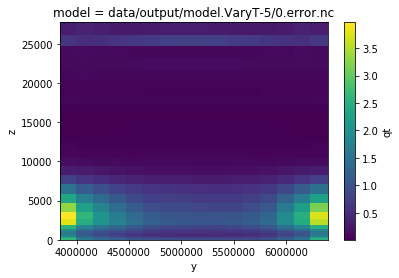

In [7]:
worse.qt.plot()

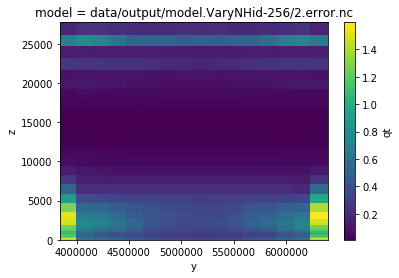

In [8]:
best.qt.plot()

The error is about 1/2 as much for this particular model

# Mass weighted

In [9]:
mass_weighted_err = (w*errs).mean(['z', 'y'])

In [10]:
qt_errs = mass_weighted_err.qt.to_dataframe().qt
qt_errs = qt_errs.sort_values()

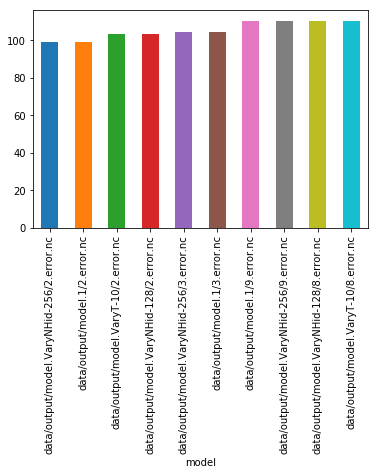

In [11]:
qt_errs[:10].plot(kind='bar')

Again we see that the same run is the best.